## Defects in Kmeans.py
1. The clusters were not adapting.
2. vector_values = zip(x_values,y_values) is a problem when converted with tf.constant()
3. Bunch of code above partitions = tf.dynamic_partition() are comments, not code. See ref link in the code.
4. sess.run(centroids) appears to be spurious. It does not seem to affect the behaviour even when the initial centroids are randomly chosen


## Lessons
1. Tests needed to show that:
    1.1. Adaptation is taking place.
    1.2. That it is taking place correctly
2. Test data needs to be ___designed___. 
3. The generation of data has been modified. See comments in the code
4. The number of steps was originally 1000. This was too much. Just a few of steps are needed.
5. The starting centroids have been fixed, instead of being randomy chose. These are mid way along the rectangle connecting the four points around which the data is generated. The adapted centroids are printed out at each step.

## TODO
1. Add check for how many points were mis classified.
2. Convert the input data to True classification and then plot it.
3. Stop loop when adaptation change becomes smaller than a defined limit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def display_partition(x_values,y_values,assignment_values):
    labels = []
    colors = ["red","blue","green","yellow"]
    for i in range(len(assignment_values)):
      labels.append(colors[(assignment_values[i])])
    color = labels
    df = pd.DataFrame\
            (dict(x =x_values,y = y_values ,color = labels ))
    fig, ax = plt.subplots()
    ax.scatter(df['x'], df['y'], c=df['color'])
    plt.show()

In [3]:
num_vectors = 2000
num_clusters = 4 # needs to be 4 as the display_partition() is hardcoded for 4 colors
n_samples_per_cluster = int(num_vectors/num_clusters) # previously hardcoded

num_steps = 10
x_values = []
y_values = []
vector_values = []

In [4]:
#CREATE RANDOM DATA
#Original code modified.
#Now there are 4 clear clusters.
#The data generated is clustered around 4 points:
# (0.2, 0.2), (0.2, 0.8), (0.8, 0.2) & (0.8, 0.8)
for i in range(num_vectors):
  if np.random.random() > 0.5:
    #x_values.append(np.random.normal(0.4, 0.7))
    #y_values.append(np.random.normal(0.2, 0.8))
    x_values.append(np.random.normal(0.2, 0.175))
    x_values.append(np.random.normal(0.2, 0.175))
    y_values.append(np.random.normal(0.2, 0.175))
    y_values.append(np.random.normal(0.8, 0.175))
    
  else:
    #x_values.append(np.random.normal(0.6, 0.4))
    #y_values.append(np.random.normal(0.8, 0.5))
    x_values.append(np.random.normal(0.8, 0.175))
    x_values.append(np.random.normal(0.8, 0.175))
    y_values.append(np.random.normal(0.8, 0.175))
    y_values.append(np.random.normal(0.2, 0.175))
#vector_values = zip(x_values,y_values)
#From https://stackoverflow.com/questions/209840/map-two-lists-into-a-dictionary-in-python
# answered Oct 16 '08 at 19:09
#Dan Lenski
vector_values_list = list(zip(x_values,y_values))

#print("No Of Keys: ", len(list(vector_values_list.keys())), " \n")
#print("No Of Values: {} \n".format(len(list(vector_values_list.keys()))))

#import itertools
#print("First 5 dictionary items: \n",dict(itertools.islice(vector_values_list.items(), 5)))
#print("First 5 vector_values_list tuples: \n",vector_values_list[0:5])

In [5]:
vectors = tf.constant(vector_values_list)
#print("Vector Values List Shape: ", np.shape(vector_values_list), "\n")

In [6]:
#plt.plot( x_values, y_values, 'o', label =' Input Data') 
#plt.legend() 
#plt.show()

In [7]:
n_samples = tf.shape(vector_values_list)[0]
random_indices = tf.random_shuffle(tf.range(0, n_samples))
begin = [0,] #Why is this needed to be a list? See tf.slice() below
size = [num_clusters,] #Why a list? See usage tf.slice() below. 
                        #And https://www.tensorflow.org/api_docs/python/tf/slice
#print("List of Cluster Sizes: ", size, "Length of List: ", len(size))
assert num_clusters == size[0]
size[0] = num_clusters # Why is this statement needed?
#print("No Of Clusters: ", size[0])

sess = tf.Session()
#vectors_list = sess.run(vectors)
#print("Shape of vectors i.e tf.constant(vector_values_list): ", (vectors_list).shape)
#print("No of Dims of vectors i.e tf.constant(vector_values_list): ", (vectors_list).ndim)
#print("First 3 Vectors\n", vectors_list[0:3])
#print("First 3 Vectors. after revaluation\n", sess.run(vectors)[0:3])

#print("No Of Samples: ", sess.run(n_samples))

indices = sess.run(random_indices)
#print("Random Indices: ", indices)
#print("Random Indices [0:4]: ", indices[0:4])

#print("Vector at [indices[0:4]]\n", sess.run(vectors)[indices[0:4]])
sess.close()

In [8]:
centroid_indices = tf.slice(indices, begin, size)

sess = tf.Session()
#print("Centroid Indices: ", sess.run(centroid_indices))
#print("Centroid Indices: ", sess.run(centroid_indices))
sess.close()

In [9]:
#centroid_vectors = tf.gather(vectors, centroid_indices)
#Now the initial cenroid vectors have been fixed.
#These have been chosen to be roughly midway between the sides of the rectangle joining the 4 points around
#which the random data has been geneerated
centroid_vectors = tf.convert_to_tensor([[0.25, 0.5], [0.5, 0.25], [0.5, 0.75], [0.75, 0.25]])
centroids = tf.Variable(centroid_vectors)

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

#init_tmp = tf.global_variables_initializer()

sess = tf.Session()
#print("Vector at [indices[0:4]]\n", sess.run(vectors)[indices[0:4]])
#print("Centroid Indices: ", sess.run(centroid_indices))
#print("Centroid Vectors: \n", sess.run(vectors)[sess.run(centroid_indices)])
##sess.run(init_tmp)
#print("Centroid: \n", sess.run(centroids))
#print("Expanded Vectors at [:,indices[0:4]]: \n", sess.run(expanded_vectors)[:, indices[0:4]])
#print("Expanded Centroid Vectors: \n", sess.run(expanded_centroids))
sess.close()

In [10]:
vectors_diffs = tf.subtract(expanded_vectors,expanded_centroids)
euclidean_distances =   \
                    tf.reduce_sum(tf.square(vectors_diffs), 2)

assignments = tf.to_int32(tf.argmin(euclidean_distances, 0))

sess = tf.Session()
#print("Shape of Mutual Diff Vectors.: \n", sess.run(vectors_diffs).shape)
#print("Mutual Diff Vectors Between Centroid Points.: \n", sess.run(vectors_diffs)[:, sess.run(centroid_indices)])
#print("\nShape of Mutual Euclidean Dist Between Centroid Points: \n", \
#      sess.run(euclidean_distances).shape)
#print("Mutual Euclidean Dist Between Centroid Points: \n", \
#      sess.run(euclidean_distances)[:, sess.run(centroid_indices)])
#print("Assignments of The Centroid Points: \n", sess.run(assignments)[sess.run(centroid_indices)])
sess.close()


In [11]:
#See example in https://www.tensorflow.org/api_docs/python/tf/dynamic_partition
#tf.dynamic_partition(
#    data,
#    partitions,
#    num_partitions,
#    name=None
#)

#data = [10, 20, 30, 40, 50]
#partitions = [0, 0, 1, 1, 0]
#num_partitions = 2
#outputs[0] = [10, 20, 50]
#outputs[1] = [30, 40]
#
partitions = tf.dynamic_partition(vectors, assignments, num_clusters)

recompute_centroids = tf.concat(\
                             [tf.expand_dims\
                              (tf.reduce_mean(partition, 0), 0)\
                              for partition in partitions], \
                            0)
#This node makes the processing adaptive
update_centroids = tf.assign(centroids, recompute_centroids)

#with tf.Session() as sess:
#    print("Partitions Shape:\n", np.shape(sess.run(partitions)))
#    print("Partitions[0]:\n", sess.run(partitions)[0], "\n")
#    print("Partitions[num_clusters - 1]:\n", sess.run(partitions)[num_clusters - 1], "\n")
#    print("Current Centroids: \n", centroids.eval(), "\n")
#    print("Updated Centroids: \n", sess.run(update_centroids), "\n")
    


Step: 0 

Centroids: 
[[0.09673525 0.5044587 ]
 [0.3621828  0.12752128]
 [0.61031544 0.85371315]
 [0.865396   0.24358432]]



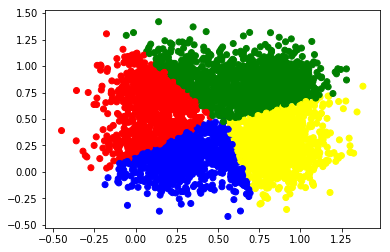

Step: 4 

Centroids: 
[[0.17529258 0.7905845 ]
 [0.20893    0.17919752]
 [0.7837745  0.808788  ]
 [0.8186498  0.20486876]]



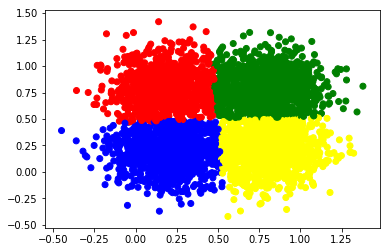

Step: 8 

Centroids: 
[[0.19098017 0.8069281 ]
 [0.19314048 0.19114166]
 [0.80054647 0.796637  ]
 [0.8046153  0.1940478 ]]



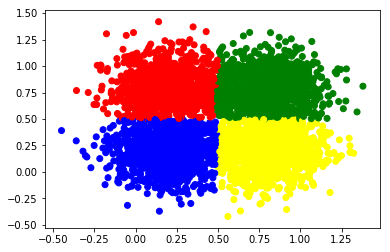

Step: 12 

Centroids: 
[[0.19098721 0.8075659 ]
 [0.19312872 0.1917916 ]
 [0.8005175  0.7957826 ]
 [0.804657   0.19316933]]



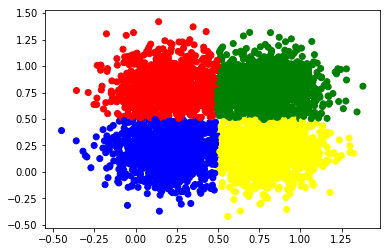

Step: 16 

Centroids: 
[[0.19098721 0.8075659 ]
 [0.19312872 0.1917916 ]
 [0.8005175  0.7957826 ]
 [0.804657   0.19316933]]



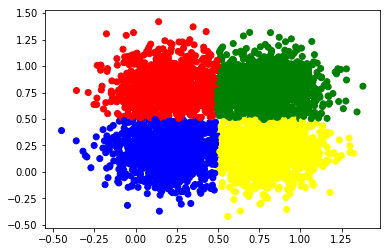

Step: 19 

Centroids: 
[[0.19098721 0.8075659 ]
 [0.19312872 0.1917916 ]
 [0.8005175  0.7957826 ]
 [0.804657   0.19316933]]



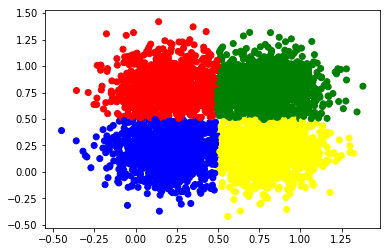

Input Data:


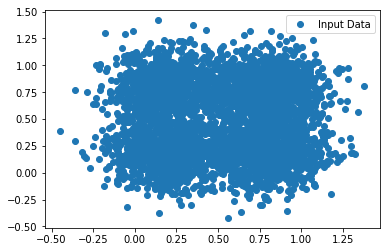

In [12]:
init_op = tf.global_variables_initializer()

sess = tf.Session()
try:
    sess.run(init_op)
    #No update happens.
    #The pattern at the end of the loop is the same as at the start
    #
    #Proposed Fix
    #Introduced the tf.assig() node above.
    #The node updates the set of centroid vectors(points).
    #
    #Now there is a change between the initial clusters and the final clusters
    factor = 2
    for step in range(factor*num_steps):
        #_, centroid_values, assignment_values =\
        #Where is centroid_values used
        #_, _, assignment_values =\
        #  sess.run([update_centroids,\
        #            centroids,\
        #            assignments])
        #Split the above for each graph node in the list. Done for clarity
        adapted_centroids = sess.run(update_centroids)
        
        #This does not seem to affect the behaviour even when the 
        #initial centroids are randomly chosen
        #
        #sess.run(centroids) 
        
        assignment_values = sess.run(assignments)
        if(0 == step or (factor*num_steps - 1) == step or (0 == step % (factor * 2))):
            print("Step: {}".format(step), "\n")
            print("Centroids: \n{}\n".format(adapted_centroids))
            display_partition(x_values,y_values,assignment_values)

    print("Input Data:")
    plt.plot(x_values,y_values, 'o', label='Input Data')
    plt.legend()
    plt.show()
finally:
    sess.close()